In [62]:
pip install pylatexenc

(0.9999999999999998+0j)


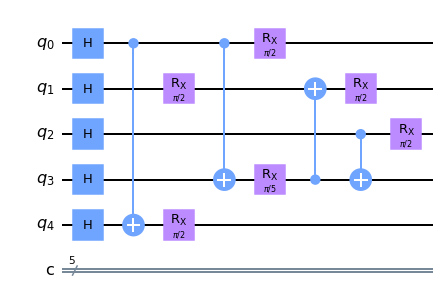

In [63]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # enlarge fonts


# Import standard qiskit modules 

from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.opflow import I, X, Y, Z

#For doing exact simulation you can use Statevector (feel free to use something else)
from qiskit.quantum_info import Statevector, random_statevector


circuit = QuantumCircuit(5,5)

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.h(4)

circuit.cx(0,4)
circuit.rx(np.pi/2,1)
circuit.rx(np.pi/2,4)

circuit.cx(0,3)

circuit.rx(np.pi/2,0)

circuit.rx(np.pi/5,3)

circuit.cx(3,1)

circuit.rx(np.pi/2,1)

circuit.cx(2,3)

circuit.rx(np.pi/2,2)



M = X

sv_uncut = Statevector.from_label('00000')

state_uncut = sv_uncut.evolve(circuit)

exp_M_uncut = state_uncut.expectation_value(M^M^M^M^M)

print(exp_M_uncut)

circuit.draw(output='mpl')

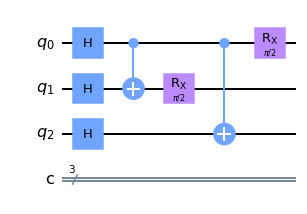

In [64]:
cut_circuit_1 = QuantumCircuit(3,3)

cut_circuit_1.h(0)
cut_circuit_1.h(1)
cut_circuit_1.h(2)

cut_circuit_1.cx(0,1)

cut_circuit_1.rx(np.pi/2,1)
cut_circuit_1.cx(0,2)


cut_circuit_1.rx(np.pi/2,0)


cut_circuit_1.draw(output='mpl')



Compute the expectation value for $M = X$ and $O_i$

In [65]:
cut_circuit_1 = QuantumCircuit(3,3)

cut_circuit_1.h(0)
cut_circuit_1.h(1)
cut_circuit_1.h(2)

cut_circuit_1.cx(0,1)

cut_circuit_1.rx(np.pi/2,1)
cut_circuit_1.cx(0,2)

cut_circuit_1.rx(np.pi/2,0)


sv = Statevector.from_label('000')

state = sv.evolve(cut_circuit_1)
c = [1/2, 1/2, 1/2, -1/2, 1/2, -1/2, 1/2, -1/2]
O = [I, X, Y, Z]
exp_op = []
for i in range(len(O)):
    exp_op.append(state.expectation_value(O[i]^M^M))
    exp_op.append(state.expectation_value(O[i]^M^M))
print(exp_op)


[(0.9999999999999998+0j), (0.9999999999999998+0j), (0.9999999999999998+0j), (0.9999999999999998+0j), 2.2371143170757382e-17j, 2.2371143170757382e-17j, (-2.2371143170757382e-17+0j), (-2.2371143170757382e-17+0j)]


Now we continue with the second piece of the circuit

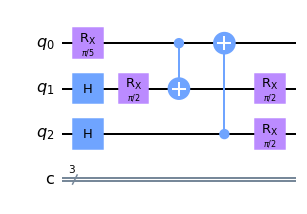

In [66]:
cut_circuit_2 = QuantumCircuit(3,3)


cut_circuit_2.rx(np.pi/5,0)
cut_circuit_2.h(1)
cut_circuit_2.rx(np.pi/2,1)
cut_circuit_2.h(2)

cut_circuit_2.cx(0,1)

cut_circuit_2.cx(2,0)
cut_circuit_2.rx(np.pi/2,1)


cut_circuit_2.rx(np.pi/2,2)


cut_circuit_2.draw(output='mpl')



print the output state when the input is $|0\rangle$

In [67]:
sv0 = Statevector.from_label('000')

state_0 = sv0.evolve(cut_circuit_2)


print the output state when the input is $|1\rangle$

In [68]:
sv1 = Statevector.from_label('001')

state_1 = sv1.evolve(cut_circuit_2)


print the output state when the input is $|+\rangle$

In [69]:
svplus = Statevector.from_label('00+')

state_plus = svplus.evolve(cut_circuit_2)


print the output state when the input is $|-\rangle$

In [70]:
svminus = Statevector.from_label('00-')

state_minus = svminus.evolve(cut_circuit_2)


print the output state when the input is $|i\rangle$

In [71]:
svi = Statevector.from_label('00r')

state_i = svi.evolve(cut_circuit_2)


print the output state when the input is $|-i\rangle$

In [72]:
svnegi = Statevector.from_label('00l')

state_negi = svnegi.evolve(cut_circuit_2)


In [73]:
states_evolved = [state_0, state_1, state_plus, state_minus, state_i, state_negi, state_0, state_1]

In [74]:
exp_operator_M = []
for i in range(len(states_evolved)):
    exp_operator_M.append(states_evolved[i].expectation_value(M^M^M))


print(exp_operator_M)

[(1.0000000000000002+0j), (1.0000000000000002+0j), (0.9999999999999999+0j), (0.9999999999999999+0j), (0.9999999999999997+0j), (0.9999999999999997+0j), (1.0000000000000002+0j), (1.0000000000000002+0j)]


In [83]:
sum_M = []
for i in range(len(exp_operator_M)):
    sum_M.append(c[i]*exp_op[i]*exp_operator_M[i])
exp_M = sum(sum_M)
print('<M> =', exp_M)


<M> = (1+0j)
